In [ ]:
# env: pymarchenko1
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import matplotlib.pyplot as plt
from subroutine.adasubtraction import adasubtraction
from scipy.ndimage import gaussian_filter1d

In [ ]:
# data
inputfile = './data/pnoise_for_adp_sub.npz'
inputdata = np.load(inputfile)
inputdata.files

# Receivers
r = inputdata['r']
dr = np.mean(np.abs(np.diff(r[0])))
nr = r.shape[1]

# Sources
s = inputdata['s']
ds = np.mean(np.abs(np.diff(s[0])))
ns = s.shape[1]

# velocity
vel = inputdata['vel']

# Time axis
t = inputdata['t']
ot, dt, nt = t[0], t[1]-t[0], len(t)

# # Axes
x, z = inputdata['x'], inputdata['z']
nx, nz = x.size, z.size


# data
dir_restore1 = inputdata['dir_restore']
pfull = inputdata['pfull']

In [19]:
# Gaussian filter along receiver array
dir_restore = gaussian_filter1d(dir_restore1, sigma=3, axis=1)

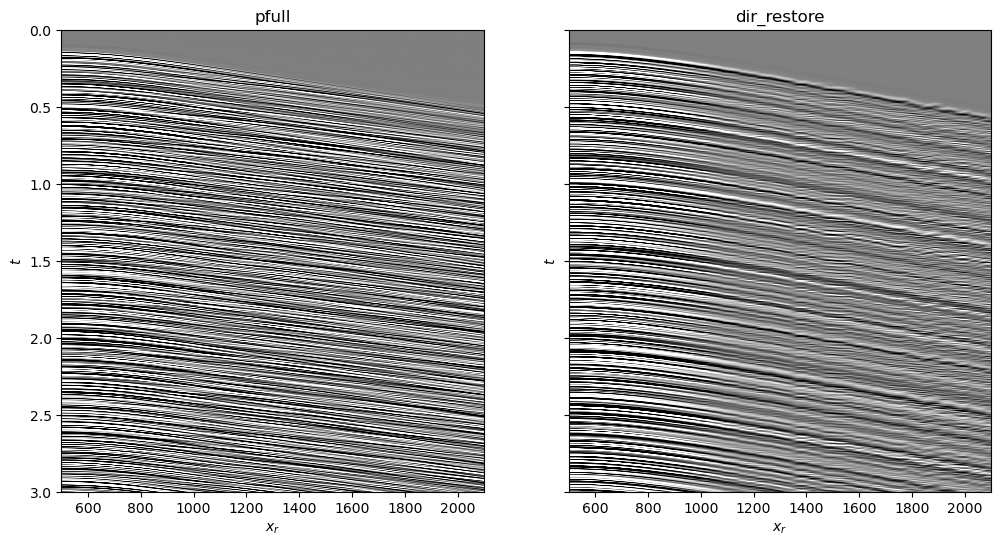

In [ ]:
clip = 0.05
fig, axs = plt.subplots(1, 2, sharey=True, figsize=(12, 6))
axs[0].imshow(pfull[ns//2,:,:].T, cmap='gray', vmin=-clip*np.abs(pfull).max(), 
              vmax=clip*np.abs(pfull).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[0].set_title('pfull'), axs[0].set_xlabel(r'$x_r$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(dir_restore[ns//2,:,:].T, cmap='gray', vmin=-clip*np.abs(pfull).max(), 
              vmax=clip*np.abs(pfull).max(), extent=(r[0,0], r[0,-1], t[-1], t[0]))
axs[1].set_title('dir_restore'), axs[1].set_xlabel(r'$x_r$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[1].set_ylim(3,0);

## subtract direct arrival

In [24]:
scaling_pq = "{:.0e}".format(np.max(0.8)/np.max(pfull))
scaling_pq = float(scaling_pq)

In [26]:
p = pfull * scaling_pq
p_ref  = dir_restore * scaling_pq

In [ ]:
nfilt = 4
solver = 'lsqr'
niter = 30
damp = 1e-1
nwin=(50,58)
p_q = np.zeros((ns,nr-1,nt-4))
directp_q = np.zeros((ns,nr-1,nt-4))
x0 = np.zeros((nfilt))

for i in range(ns):
    if i%10 == 0:
        print("running for is = ",i)
    data = p[i]
    dir_modeling = p_ref[i]
    primary_est, dir_est, filts_est = adasubtraction(data, dir_modeling, nfilt, solver = solver,
                                                          solver_dict = dict(x0=x0, niter=niter, damp =damp) ,
                                                          nwin=nwin,clipping=True)
    p_q[i]       = primary_est
    directp_q[i] = dir_est

running for is =  0
running for is =  10
running for is =  20
running for is =  30
running for is =  40
running for is =  50
running for is =  60
running for is =  70
running for is =  80
running for is =  90
running for is =  100
running for is =  110
running for is =  120
running for is =  130
running for is =  140
running for is =  150
running for is =  160
running for is =  170
running for is =  180
running for is =  190
running for is =  200
running for is =  210
running for is =  220
running for is =  230
running for is =  240
running for is =  250
running for is =  260
running for is =  270
running for is =  280
running for is =  290
 
LSQR finished
The exact solution is x = 0                               
 
LSQR finished
The exact solution is x = 0                               
 
LSQR finished
The exact solution is x = 0                               
 
LSQR finished
The exact solution is x = 0                               
 
LSQR finished
The exact solution is x = 0        

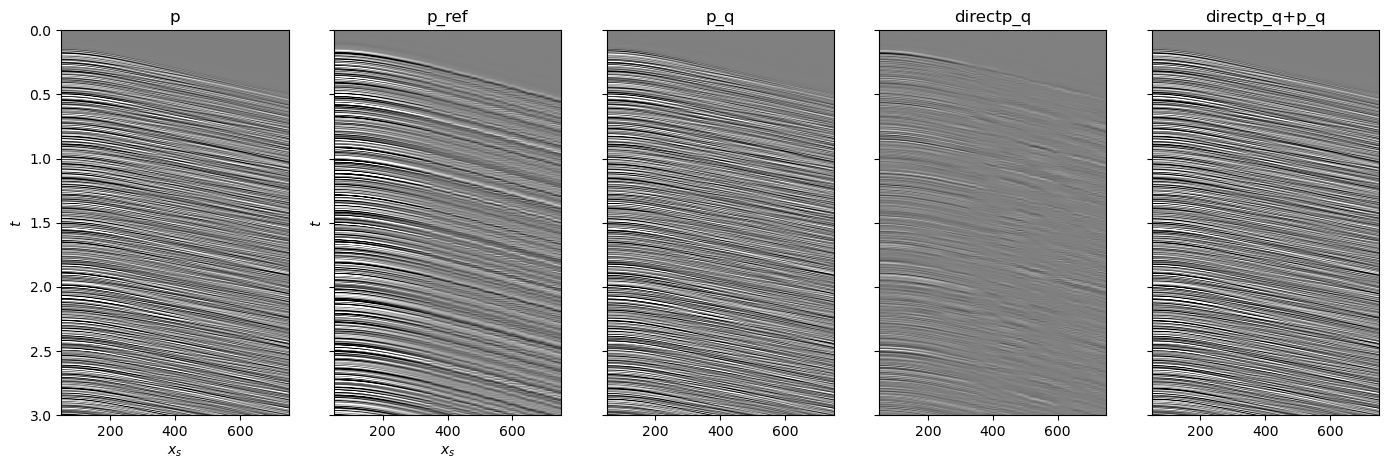

In [31]:
fig, axs = plt.subplots(1, 5, sharey=True, figsize=(17, 5))
axs[0].imshow(p[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
axs[0].set_title('p'), axs[0].set_xlabel(r'$x_s$'), axs[0].set_ylabel(r'$t$')
axs[0].axis('tight')
axs[1].imshow(p_ref[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
axs[1].set_title('p_ref'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[1].axis('tight')
axs[2].imshow(p_q[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
axs[2].set_title('p_q'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[2].axis('tight')
axs[3].imshow(directp_q[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
axs[3].set_title('directp_q'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[3].axis('tight')

axs[4].imshow(directp_q[nr//2].T+p_q[nr//2].T, cmap='gray', vmin=-0.1*np.abs(p).max(), 
              vmax=0.1*np.abs(p).max(), extent=(s[1,0], s[1,-1], t[-1], t[0]))
axs[4].set_title('directp_q+p_q'), axs[1].set_xlabel(r'$x_s$'), axs[1].set_ylabel(r'$t$')
axs[4].axis('tight')
axs[4].set_ylim(3,0);

In [32]:
p_q = p_q / scaling_pq
directp_q = directp_q / scaling_pq

In [33]:
t.shape, r.shape, s.shape1

((2933,), (2, 401), (2, 351))

In [ ]:
print('dataset is arranged as(S, R, T)')
print('size of p_q is ',np.shape(p_q))
print('size of directp_q is ',np.shape(directp_q))

dataset is arranged as(S, R, T)
size of p_q is  (351, 400, 2929)
size of directp_q is  (351, 400, 2929)


In [35]:
t = t[:-4]
nt=nt-4
r = r[:,:-1]
nr = nr - 1

In [36]:
t.shape, r.shape, s.shape, p_q.max(), directp_q.max()

((2929,), (2, 400), (2, 351), 0.0012276771854559162, 0.0008367932850533152)

In [ ]:
np.savez('./data/pniose_for_cc_stacking.npz', p_without_direct=p_q, pfull=p_q+directp_q, x=x, z=z, t=t, r=r, s=s, vel=vel)